In [297]:
import pandas as pd
#Read the data
df_2011 = pd.read_csv("india-districts-census-2011.csv")
df_2001 = pd.read_csv("india_census_2001.csv")
#selecting required columns
df_2011 = df_2011[['District code', 'State name', 'District name', 'Population', 'Male', 'Female', 'Literate', 'Male_Literate', 'Female_Literate', 'Workers', 'Male_Workers', 'Female_Workers','Age_Group_0_29','Age_Group_30_49','Age_Group_50']]
df_2001 = df_2001[['State','District','Persons','Males','Females','Persons..literate','Males..Literate','Females..Literate']]

In [298]:
state_map_01to11 = dict(zip(sorted(set(df_2001['State'])), sorted(set(df_2011['State name']))))
tmp_fix = dict(zip(list(state_map_01to11.keys())[9:-10], 
                   [list(state_map_01to11.values())[-11]]+list(state_map_01to11.values())[9:-11]))
tmp1_fix = {'CG': 'CHHATTISGARH',
 'Chandigarh': 'CHANDIGARH',
 'D_D': 'DAMAN AND DIU',
 'D_N_H': 'DADRA AND NAGAR HAVELI'}
state_map = {**state_map_01to11, **tmp_fix, **tmp1_fix}
df_2001 = df_2001.replace({"State": state_map})

In [299]:
df_2011.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,Workers,Male_Workers,Female_Workers,Age_Group_0_29,Age_Group_30_49,Age_Group_50
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,229064,190899,38165,600759,178435,89679
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,214866,162578,52288,503223,160933,88978
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,75079,53265,21814,70703,41515,21019
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,51873,39839,12034,87532,35561,17488
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,163333,98391,161393,117677,43716,304979,109818,61334


In [307]:
#2011 data processing
df_2011_pr = pd.DataFrame()
df_2011_pr['state'] = df_2011['State name'].unique().tolist()
df_2011_pr['population'] = df_2011.groupby(['State name'], sort=False)['Population'].sum().tolist()
df_2011_pr['population_male'] = df_2011.groupby(['State name'], sort=False)['Male'].sum().tolist()
df_2011_pr['population_female'] = df_2011.groupby(['State name'], sort=False)['Female'].sum().tolist()
df_2011_pr['literate'] = df_2011.groupby(['State name'], sort=False)['Literate'].sum().tolist()
df_2011_pr['literate_male'] = df_2011.groupby(['State name'], sort=False)['Male_Literate'].sum().tolist()
df_2011_pr['literate_female'] = df_2011.groupby(['State name'], sort=False)['Female_Literate'].sum().tolist()
df_2011_pr['workers'] = df_2011.groupby(['State name'], sort=False)['Workers'].sum().tolist()
df_2011_pr['workers_male'] = df_2011.groupby(['State name'], sort=False)['Male_Workers'].sum().tolist()
df_2011_pr['workers_female'] = df_2011.groupby(['State name'], sort=False)['Female_Workers'].sum().tolist()
df_2011_pr['age_0_29'] = df_2011.groupby(['State name'], sort=False)['Age_Group_0_29'].sum().tolist()
df_2011_pr['age_30'] = (df_2011.groupby(['State name'], sort=False)['Age_Group_30_49'].sum() + df_2011.groupby(['State name'], sort=False)['Age_Group_50'].sum()).tolist()

In [308]:
#2001 data processing
df_2001_pr = pd.DataFrame()
df_2001_pr['state'] = df_2001['State'].unique().tolist()
df_2001_pr['population'] = df_2001.groupby(['State'], sort=False)['Persons'].sum().tolist()
df_2001_pr['population_male'] = df_2001.groupby(['State'], sort=False)['Males'].sum().tolist()
df_2001_pr['population_female'] = df_2001.groupby(['State'], sort=False)['Females'].sum().tolist()
df_2001_pr['literate'] = df_2001.groupby(['State'], sort=False)['Persons..literate'].sum().tolist()
df_2001_pr['literate_male'] = df_2001.groupby(['State'], sort=False)['Males..Literate'].sum().tolist()
df_2001_pr['literate_female'] = df_2001.groupby(['State'], sort=False)['Females..Literate'].sum().tolist()

In [304]:
df_2011_pr.shape

(35, 6)

In [302]:
df_2001_pr.shape

(35, 7)

In [309]:
#new columns for stat 2011
df_2011_pr['sex_ratio'] = df_2011_pr['population_female']*1000//df_2011_pr['population_male']
df_2011_pr['sex_ratio_literate'] = df_2011_pr['literate_female']*1000//df_2011_pr['literate_male']
df_2011_pr['sex_ratio_workers'] = df_2011_pr['workers_female']*1000//df_2011_pr['workers_male']
df_2011_pr['literacy_rate_female'] = df_2011_pr['literate_female']*1000//df_2011_pr['population_female']
df_2011_pr['literacy_rate'] = df_2011_pr['literate']*1000//df_2011_pr['population']
df_2011_pr['working_women_pr'] = df_2011_pr['workers_female']*1000//df_2011_pr['population_female']
df_2011_pr['working_population'] = df_2011_pr['workers']*1000//df_2011_pr['population']
df_2011_pr['youth_population'] = df_2011_pr['age_0_29']*1000//(df_2011_pr['age_0_29']+df_2011_pr['age_30'])

In [310]:
df_2011_pr.head()

,state,population,population_male,population_female,literate,literate_male,literate_female,workers,workers_male,workers_female,age_0_29,age_30,sex_ratio,sex_ratio_literate,sex_ratio_workers,literacy_rate_female,literacy_rate,working_women_pr,working_population,youth_population
0,JAMMU AND KASHMIR,12541302,6640662,5900640,7067233,4264671,2802562,4322713,3195090,1127623,7725207,4800976,888,657,352,474,563,191,344,616
1,HIMACHAL PRADESH,6864602,3481873,3382729,5039736,2752590,2287146,3559422,2043373,1516049,3648872,3205567,971,830,741,676,734,448,518,532
2,PUNJAB,27743338,14639465,13103873,18707137,10436056,8271081,9897362,8074157,1823205,15143130,12558686,895,792,225,631,674,139,356,546
3,CHANDIGARH,1055450,580663,474787,805438,465346,340092,404136,328159,75977,602411,452693,817,730,231,716,763,160,382,570
4,UTTARAKHAND,10086292,5137773,4948519,6880953,3863708,3017245,3872275,2551921,1320354,6033370,4036314,963,780,517,609,682,266,383,599


In [311]:
#new columns for stat 2001
df_2001_pr['sex_ratio'] = df_2001_pr['population_female']*1000//df_2001_pr['population_male']
df_2001_pr['sex_ratio_literate'] = df_2001_pr['literate_female']*1000//df_2001_pr['literate_male']
df_2001_pr['literacy_rate_female'] = df_2001_pr['literate_female']*1000//df_2001_pr['population_female']
df_2001_pr['literacy_rate'] = df_2001_pr['literate']*1000//df_2001_pr['population']

In [312]:
df_2001_pr.head()

,state,population,population_male,population_female,literate,literate_male,literate_female,sex_ratio,sex_ratio_literate,literacy_rate_female,literacy_rate
0,ANDAMAN AND NICOBAR ISLANDS,356152,192972,163180,253135,146831,106304,845,723,651,710
1,ANDHRA PRADESH,71308587,36067773,35240814,37126595,21940112,15186483,977,692,430,520
2,ARUNACHAL PRADESH,1097968,579941,518027,484785,303281,181504,893,598,350,441
3,ASSAM,26655528,13777037,12878491,14015354,8188697,5826657,934,711,452,525
4,BIHAR,82998509,43243795,39754714,31109577,20644376,10465201,919,506,263,374


In [320]:
df_2011_pr.columns

Index(['state', 'population', 'population_male', 'population_female',
       'literate', 'literate_male', 'literate_female', 'workers',
       'workers_male', 'workers_female', 'age_0_29', 'age_30', 'sex_ratio',
       'sex_ratio_literate', 'sex_ratio_workers', 'literacy_rate_female',
       'literacy_rate', 'working_women_pr', 'working_population',
       'youth_population'],
      dtype='object')

In [333]:
#Important stats
df_2011_pr.sort_values(by=['sex_ratio'], ascending=False).iloc[:10][['state','sex_ratio','sex_ratio_literate','sex_ratio_workers']]

,state,sex_ratio,sex_ratio_literate,sex_ratio_workers
31,KERALA,1084,1052,374
33,PONDICHERRY,1037,924,336
32,TAMIL NADU,996,848,534
27,ANDHRA PRADESH,992,789,630
21,CHHATTISGARH,990,746,707
16,MEGHALAYA,988,953,684
13,MANIPUR,985,835,764
20,ORISSA,978,772,473
14,MIZORAM,975,934,674
29,GOA,973,892,375


In [336]:
df_2011_pr.sort_values(by=['sex_ratio_literate'], ascending=False).iloc[:5][['state', 'sex_ratio_literate']]

,state,sex_ratio_literate
31,KERALA,1052
16,MEGHALAYA,953
14,MIZORAM,934
33,PONDICHERRY,924
29,GOA,892


In [324]:
df_2011_pr.sort_values(by=['literacy_rate_female'], ascending=False).iloc[:5][['state', 'literacy_rate_female']]

,state,literacy_rate_female
31,KERALA,830
30,LAKSHADWEEP,782
29,GOA,764
14,MIZORAM,755
34,ANDAMAN AND NICOBAR ISLANDS,730


In [344]:
df_2011_pr.sort_values(by=['sex_ratio_workers'], ascending=False).iloc[:10][['state', 'sex_ratio_workers','working_women_pr']]

,state,sex_ratio_workers,working_women_pr
12,NAGALAND,779,447
13,MANIPUR,764,398
1,HIMACHAL PRADESH,741,448
21,CHHATTISGARH,707,396
16,MEGHALAYA,684,326
11,ARUNACHAL PRADESH,677,354
14,MIZORAM,674,361
7,RAJASTHAN,633,351
27,ANDHRA PRADESH,630,361
10,SIKKIM,585,395


In [322]:
df_2011_pr.sort_values(by=['working_women_pr'], ascending=False).iloc[:5][['state', 'working_women_pr']]

,state,working_women_pr
1,HIMACHAL PRADESH,448
12,NAGALAND,447
13,MANIPUR,398
21,CHHATTISGARH,396
10,SIKKIM,395


In [197]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

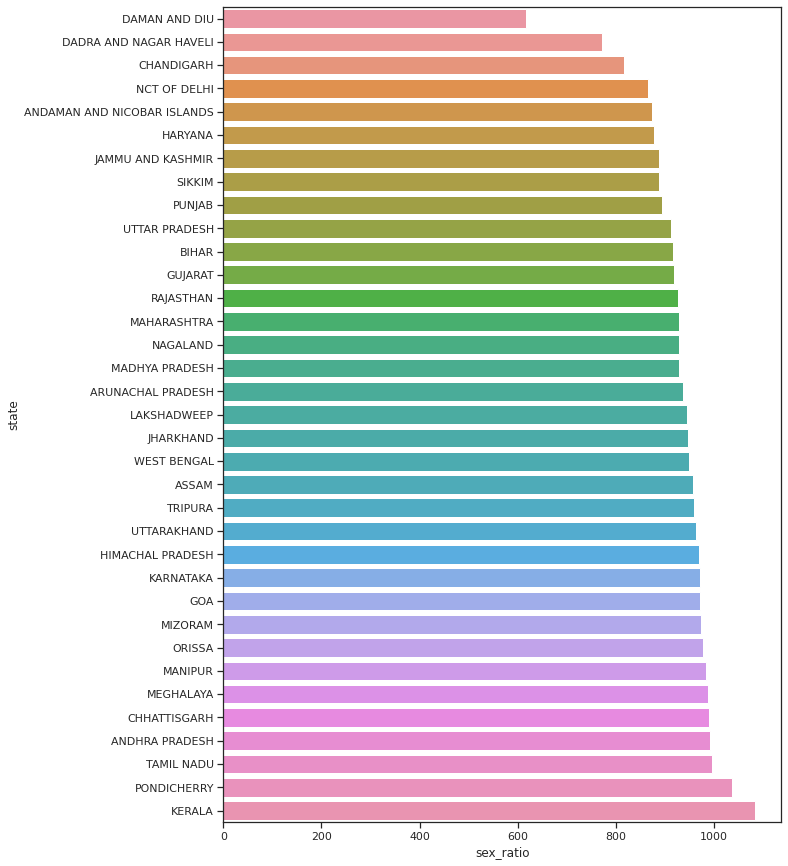

In [199]:
plt.figure(figsize=(10, 15))
sns.barplot(y="state", x="sex_ratio", hue=None, data=df_2011_pr.sort_values(by=['sex_ratio']))

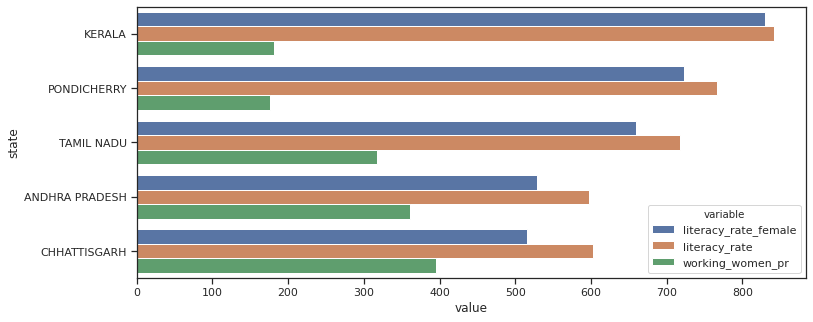

In [354]:
#Important stats
df_temp = df_2011_pr.sort_values(by=['sex_ratio'], ascending=False).iloc[:5][['state','sex_ratio','working_women_pr','literacy_rate_female', 'literacy_rate']]
df_temp = pd.melt(df_temp, id_vars=['state'], value_vars=['literacy_rate_female', 'literacy_rate', 'working_women_pr'])
plt.figure(figsize=(12, 5))
sns.barplot(y="state", x="value", hue='variable', data=df_temp)

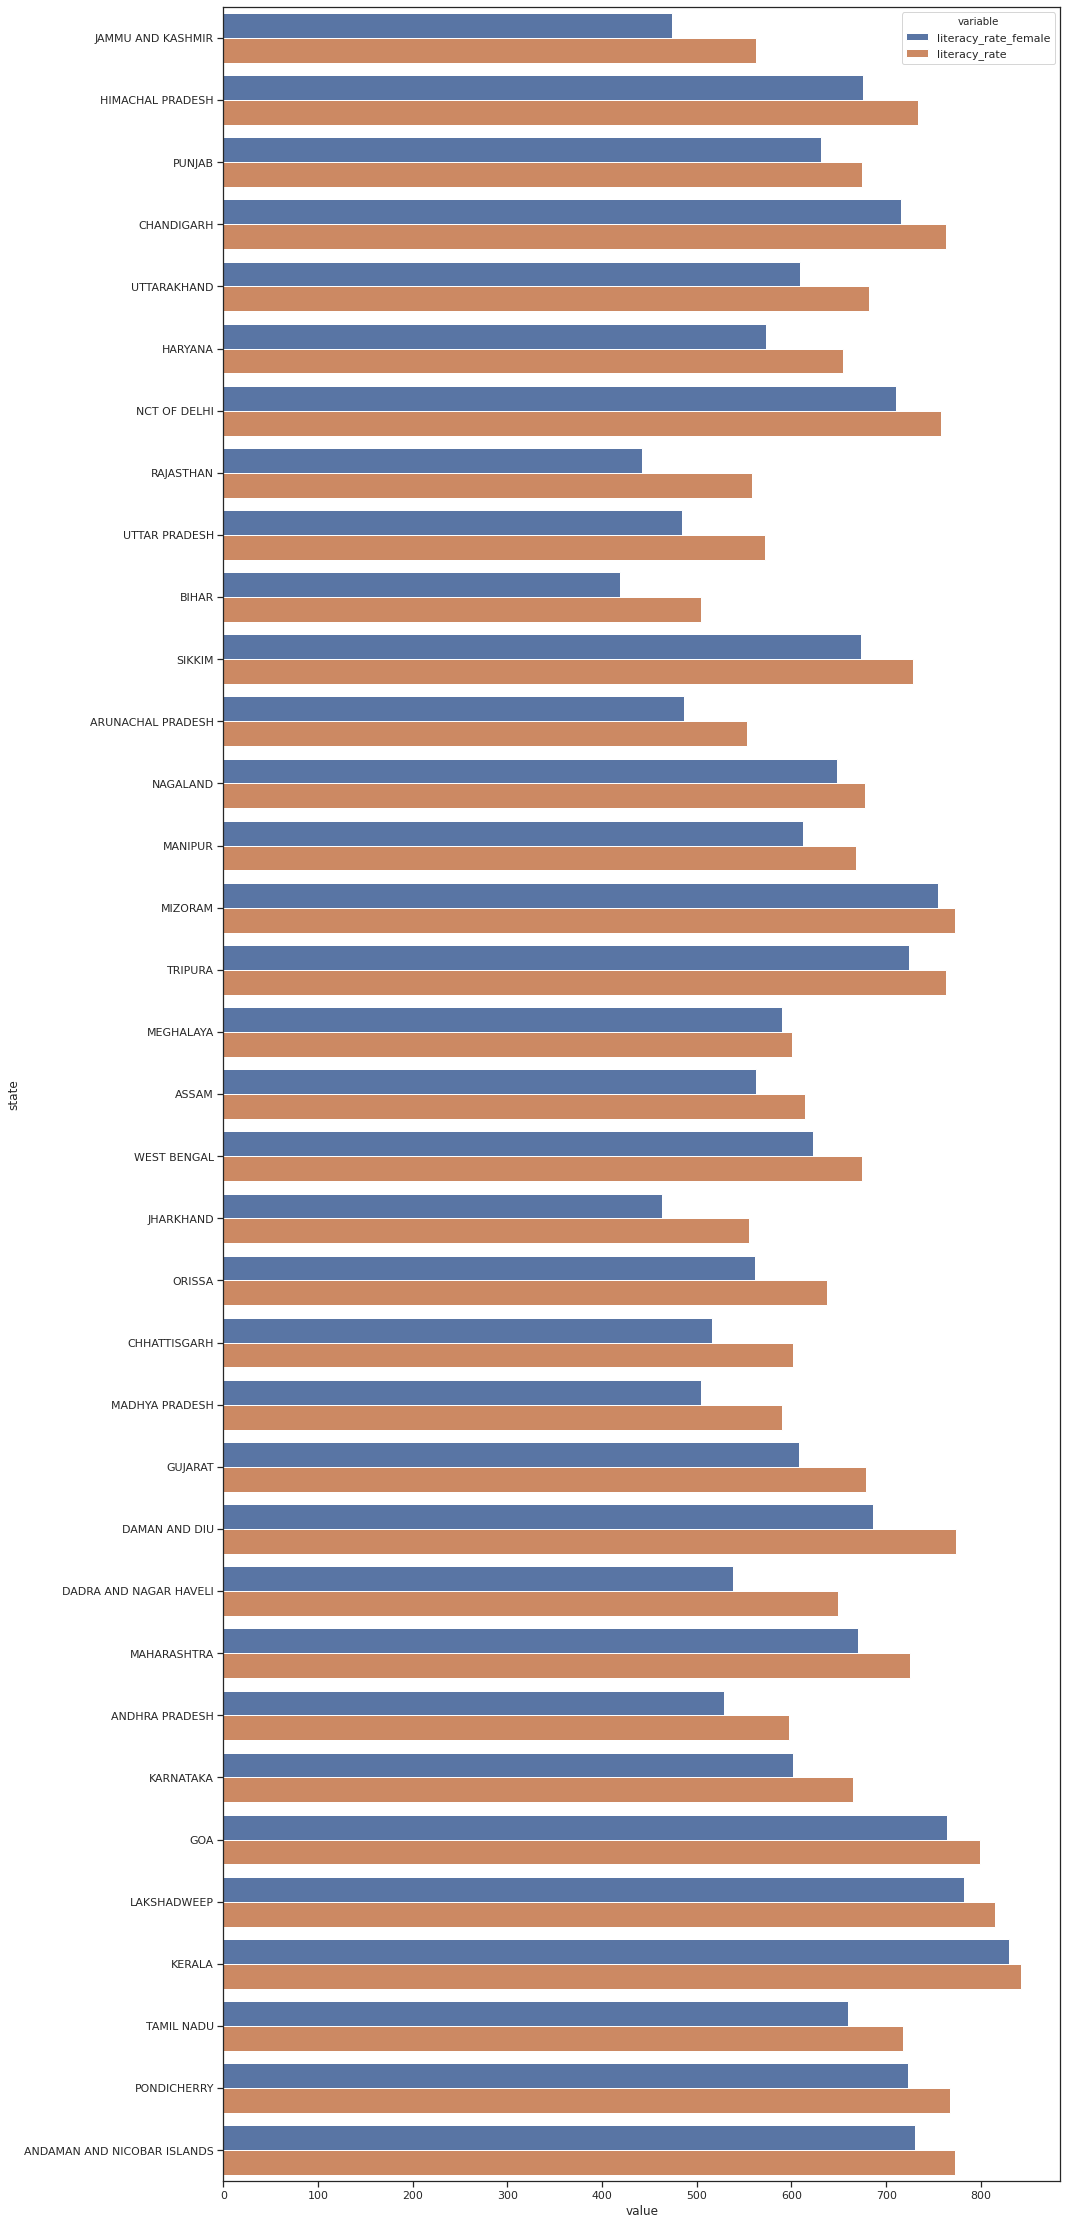

In [214]:
df_temp = pd.melt(df_2011_pr, id_vars=['state'], value_vars=['literacy_rate_female', 'literacy_rate'])
plt.figure(figsize=(15, 40))
sns.barplot(y="state", x="value", hue='variable', data=df_temp)

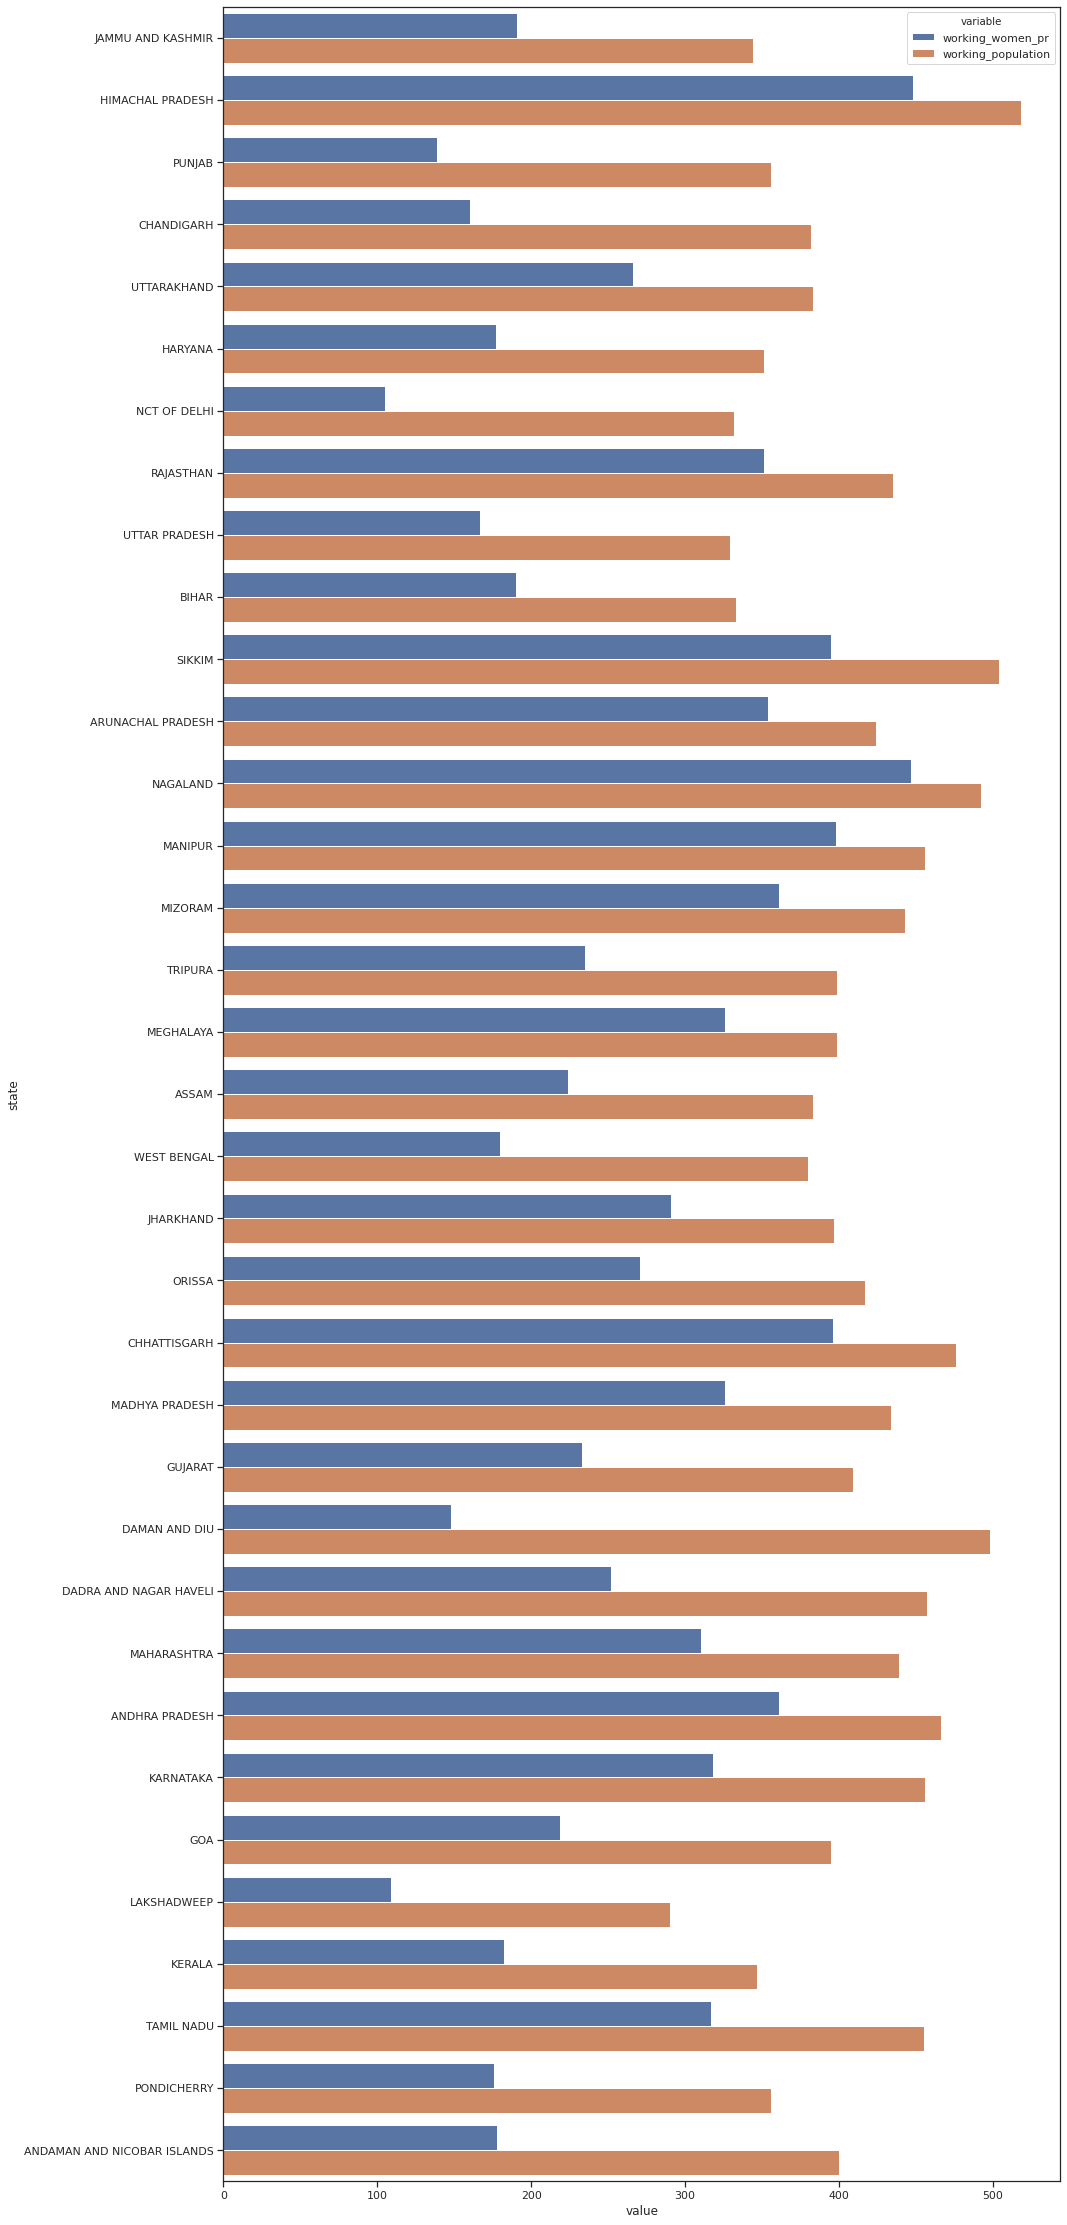

In [201]:
df_temp = pd.melt(df_2011_pr, id_vars=['state'], value_vars=['working_women_pr', 'working_population'])
plt.figure(figsize=(15, 40))
sns.barplot(y="state", x="value", hue='variable', data=df_temp)

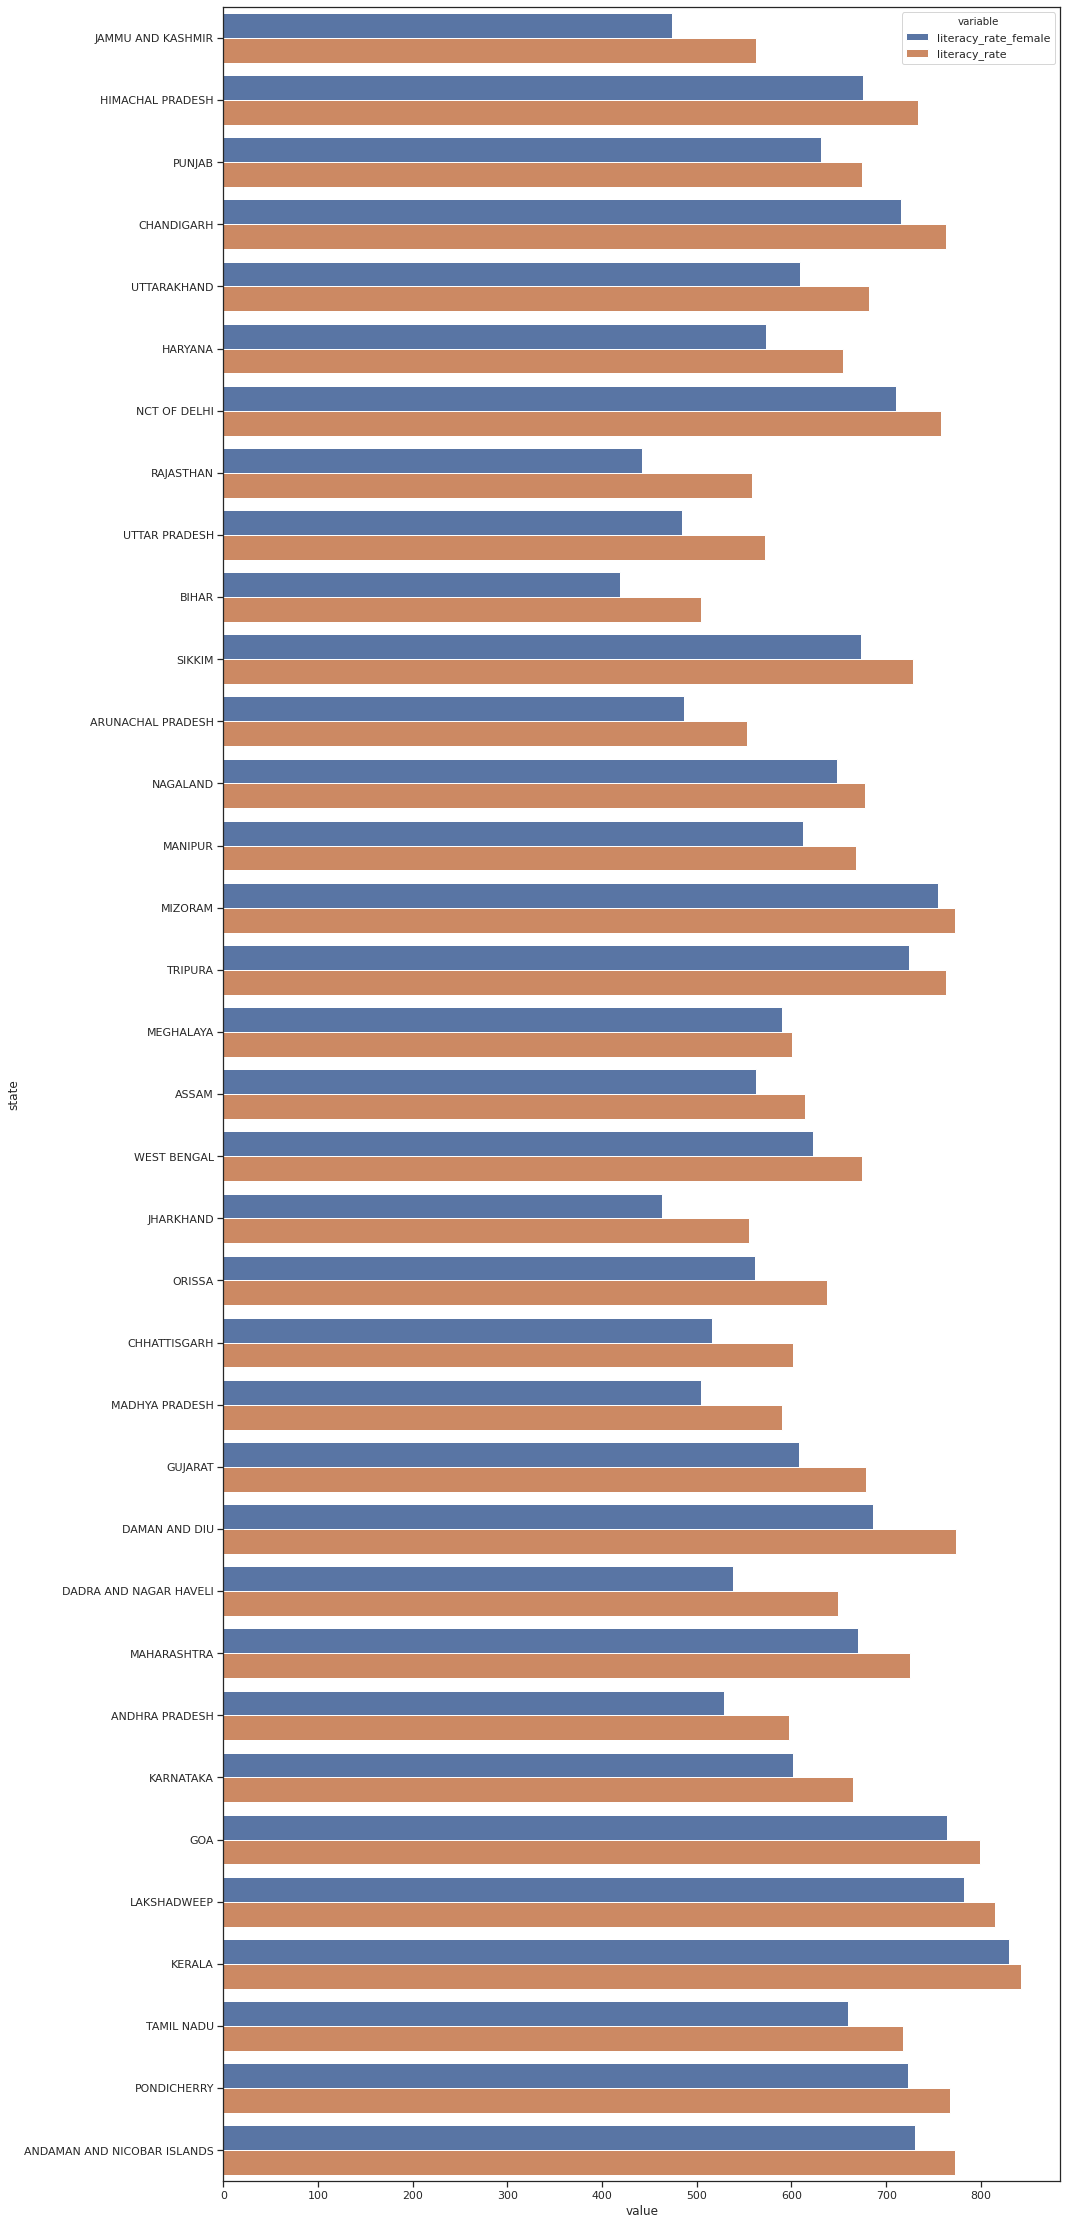

In [202]:
df_temp = pd.melt(df_2011_pr, id_vars=['state'], value_vars=['literacy_rate_female', 'literacy_rate'])
plt.figure(figsize=(15, 40))
sns.barplot(y="state", x="value", hue='variable', data=df_temp)

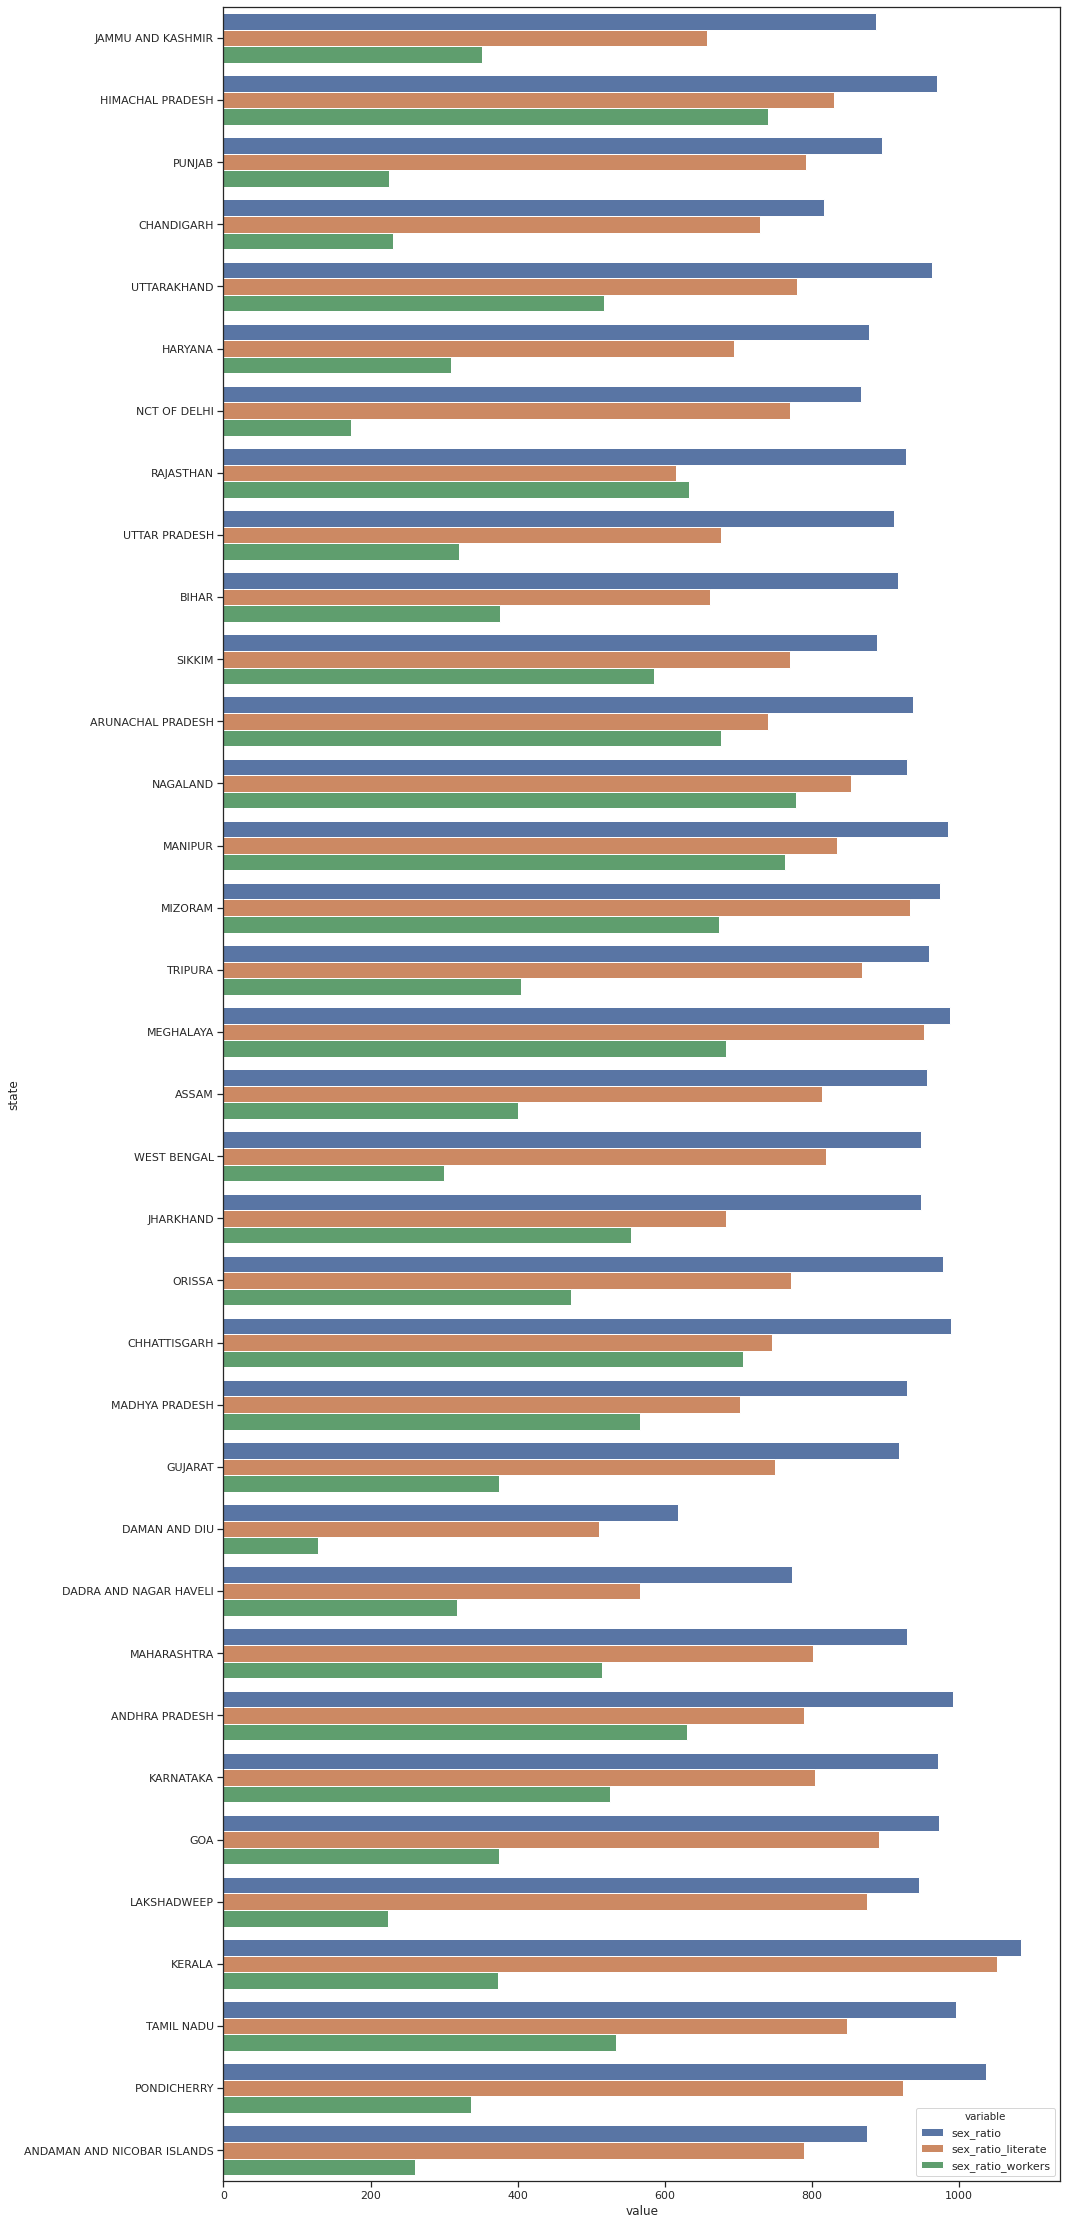

In [204]:
df_temp = pd.melt(df_2011_pr, id_vars=['state'], value_vars=['sex_ratio', 'sex_ratio_literate', 'sex_ratio_workers'])
plt.figure(figsize=(15, 40))
sns.barplot(y="state", x="value", hue='variable', data=df_temp)

In [207]:
df_temp.head()

,state,variable,value
0,JAMMU AND KASHMIR,sex_ratio_literate,657
1,HIMACHAL PRADESH,sex_ratio_literate,830
2,PUNJAB,sex_ratio_literate,792
3,CHANDIGARH,sex_ratio_literate,730
4,UTTARAKHAND,sex_ratio_literate,780


In [221]:
df_2011_pr.sort_values(by=['sex_ratio'], ascending=False).iloc[:5]

,state,population,population_male,population_female,literate,literate_male,literate_female,workers,workers_male,workers_female,age_0_29,age_30,sex_ratio,sex_ratio_literate,sex_ratio_workers,literacy_rate_female,literacy_rate,working_women_pr,working_population,youth_population
31,KERALA,33406061,16027412,17378649,28135824,13704903,14430921,11619063,8451569,3167494,15711427,17660148,1084,1052,374,830,842,182,347,470
33,PONDICHERRY,1247953,612511,635442,957309,497378,459931,444968,332931,112037,627771,619081,1037,924,336,723,767,176,356,503
32,TAMIL NADU,72147030,36137975,36009055,51837507,28040491,23797016,32884681,21434978,11449703,36336584,35743641,996,848,534,660,718,317,455,504
27,ANDHRA PRADESH,84580777,42442146,42138631,50556760,28251243,22305517,39422906,24185595,15237311,45815669,37993677,992,789,630,529,597,361,466,546
21,CHHATTISGARH,25545198,12832895,12712303,15379922,8807893,6572029,12180225,7133866,5046359,15230475,10291608,990,746,707,516,602,396,476,596


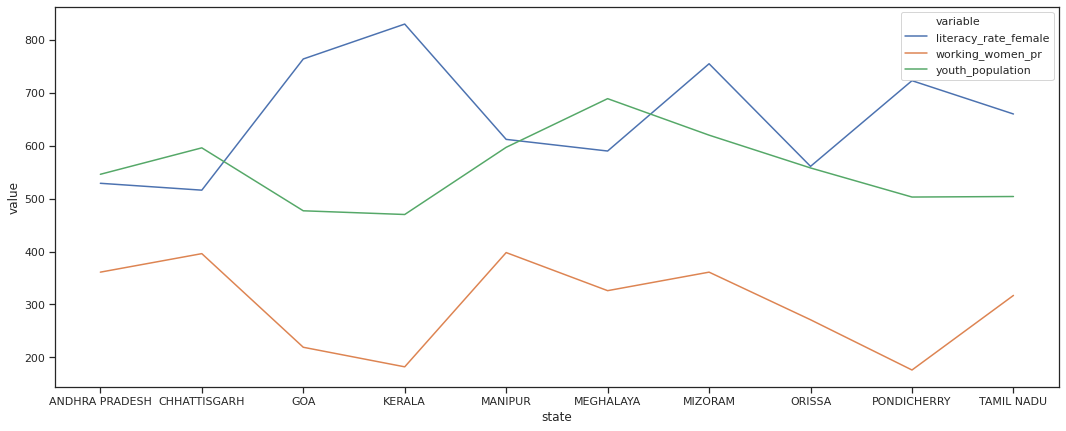

In [358]:
df_temp = pd.melt(df_2011_pr.sort_values(by=['sex_ratio'], ascending=False).iloc[:10], id_vars=['state'], value_vars=['literacy_rate_female','working_women_pr','youth_population'])
plt.figure(figsize=(18, 7))
sns.lineplot(x="state", y="value", hue='variable', data=df_temp)

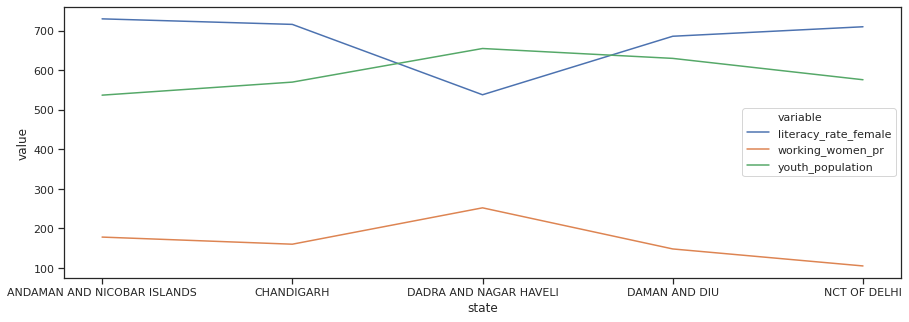

In [231]:
df_temp = pd.melt(df_2011_pr.sort_values(by=['sex_ratio']).iloc[:5], id_vars=['state'], value_vars=['literacy_rate_female','working_women_pr','youth_population'])
plt.figure(figsize=(15, 5))
sns.lineplot(x="state", y="value", hue='variable', data=df_temp)

In [359]:
df_2001_pr = df_2001_pr.sort_values(by=['state'])
df_2011_pr = df_2011_pr.sort_values(by=['state'])

In [360]:
df_comp = pd.DataFrame()
df_comp['state'] = list(df_2011_pr['state'])
df_comp['sex_ratio_change'] = df_2011_pr['sex_ratio'] - df_2001_pr['sex_ratio']
df_comp['sex_ratio_literate_change'] = df_2011_pr['sex_ratio_literate'] - df_2001_pr['sex_ratio_literate']
df_comp['literacy_rate_female_change'] = df_2011_pr['literacy_rate_female'] - df_2001_pr['literacy_rate_female']
df_comp['literacy_rate_change'] = df_2011_pr['literacy_rate'] - df_2001_pr['literacy_rate']
df_comp.head()

,state,sex_ratio_change,sex_ratio_literate_change,literacy_rate_female_change,literacy_rate_change
0,ANDAMAN AND NICOBAR ISLANDS,43,-66,-177,-147
1,ANDHRA PRADESH,-6,138,246,214
2,ARUNACHAL PRADESH,2,194,281,233
3,ASSAM,-117,19,264,238
4,BIHAR,44,274,346,308


In [366]:
df_comp.sort_values(by=['sex_ratio_change'], ascending=False).iloc[:5,:3]

,state,sex_ratio_change,sex_ratio_literate_change
7,DADRA AND NAGAR HAVELI,218,100
31,TRIPURA,136,295
27,PUNJAB,117,42
9,GOA,105,221
29,SIKKIM,99,209


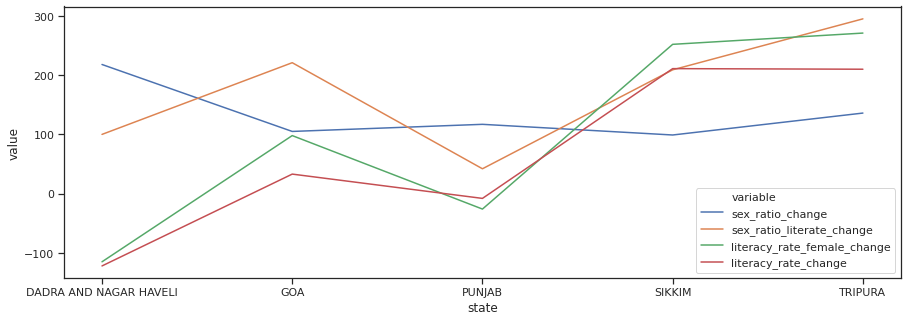

In [292]:
df_temp = pd.melt(df_comp.sort_values(by=['sex_ratio_change'], ascending=False).iloc[:5], id_vars=['state'], value_vars=['sex_ratio_change', 'sex_ratio_literate_change',
       'literacy_rate_female_change', 'literacy_rate_change'])
plt.figure(figsize=(15, 5))
sns.lineplot(x="state", y="value", hue='variable', data=df_temp)

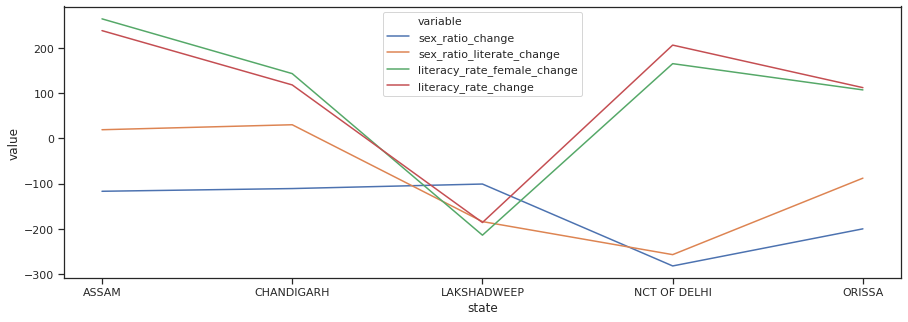

In [291]:
df_temp = pd.melt(df_comp.sort_values(by=['sex_ratio_change']).iloc[:5], id_vars=['state'], value_vars=['sex_ratio_change', 'sex_ratio_literate_change',
       'literacy_rate_female_change', 'literacy_rate_change'])
plt.figure(figsize=(15, 5))
sns.lineplot(x="state", y="value", hue='variable', data=df_temp)

In [368]:
df_2001.head(1)

,State,District,Persons,Males,Females,Persons..literate,Males..Literate,Females..Literate
0,ANDAMAN AND NICOBAR ISLANDS,"District Andamans (01), Andaman & Nicobar Isla...",314084,170319,143765,226600,131223,95377


In [375]:
df_2011.head(1)

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,Workers,Male_Workers,Female_Workers,Age_Group_0_29,Age_Group_30_49,Age_Group_50
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,229064,190899,38165,600759,178435,89679


In [389]:
female_2001 = round(df_2001['Females'].sum()*100/df_2001['Persons'].sum(), 2)
female_2011 = round(df_2011['Female'].sum()*100/df_2011['Population'].sum(), 2)
female_growth = round(female_2011 - female_2001, 2)
female_literates_2001 = round(df_2001['Females..Literate'].sum()*100/df_2001['Persons..literate'].sum(), 2)
female_literates_2011 = round(df_2011['Female_Literate'].sum()*100/df_2011['Literate'].sum(), 2)
female_literates_growth = round(female_literates_2011 - female_literates_2001, 2)
female_workers_2001 = 'NA'
female_workers_2011 = round(df_2011['Female_Workers'].sum()*100/df_2011['Workers'].sum(), 2)
female_workers_growth = 'NA'

In [397]:
df_stat = pd.DataFrame()
df_stat['name'] = ['population', 'Literacy', 'Workers']
df_stat['2001'] = [str(female_2001)+'%', str(female_literates_2001)+'%', female_workers_2001]
df_stat['2011'] = [str(female_2011)+'%', str(female_literates_2011)+'%', str(female_workers_2011)+'%']
df_stat['growth'] = ['+'+str(female_growth)+'%', '+'+str(female_literates_growth)+'%', female_workers_growth]
df_stat.head()

,name,2001,2011,growth
0,population,48.26%,48.53%,+0.27%
1,Literacy,39.95%,43.07%,+3.12%
2,Workers,NA,31.12%,NA


In [387]:
df_2011['Female_Workers'].sum()

149948993

In [386]:
round(df_2011['Female_Workers'].sum()*100/df_2011['Workers'].sum(), 2)

31.12

In [ ]:
127220 / 